In [2]:
import pandas as pd 
import numpy as np
import warnings
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_parquet("cupones_no_supervisado.parquet")

In [7]:
df_clusters = pd.read_parquet("agrupado_mes_con_clusters.parquet")
df_clusters_dni = pd.read_parquet("dni_clusters.parquet")

# Analisis de etiquetas producidas para los DNIs

In [12]:
df_all_clust = df.merge(df_clusters_dni, on='dni_titular_movimiento', validate='m:1')
df_all_clust

,dni_titular_movimiento,moneda_movimiento,id_comercio_movimiento,nombre_comercio_histo,numero_cupon_movimiento,debito_credito_movimiento,producto_naranja_movimiento,codigo_empresa_movimiento,tipo_producto_tarjeta_movimiento,plan_movimiento,...,anio_mes_cupon,monto_ajustado,nombre_comercio_concat,cargo_sector_desc_hist,edad_cliente,antig_cliente,comercio_cat,cluster_kmeans,cluster_ts_kmeuc,cluster_ts_kmdtw
0,0001686b52949b5461ffcbc766687e45031,0,020099784,INTERES POR MORA US,200813,0,PL,1,0,1,...,202008,5.52,INTERES POR MORA US,Sector_Empleado_Comercio,62,92,0,14,3,0
1,0001686b52949b5461ffcbc766687e45031,0,020099784,INTERES POR MORA US,200813,0,PL,1,0,1,...,202008,5.52,INTERES POR MORA US,Sector_Empleado_Comercio,62,92,0,14,3,0
2,0001686b52949b5461ffcbc766687e45031,0,020100936,CARGO POR GESTION DE COBRANZA,999990,0,PL,1,0,1,...,202008,68.13,CARGO POR GESTION DE COBRANZA,Sector_Empleado_Comercio,62,92,0,14,3,0
3,0001686b52949b5461ffcbc766687e45031,0,020100936,CARGO POR GESTION DE COBRANZA,999990,0,PL,1,0,1,...,202008,68.13,CARGO POR GESTION DE COBRANZA,Sector_Empleado_Comercio,62,92,0,14,3,0
4,0001686b52949b5461ffcbc766687e45031,0,020100936,CARGO POR GESTION DE COBRANZA,999990,0,PL,1,0,1,...,202009,129.12,CARGO POR GESTION DE COBRANZA,Sector_Empleado_Comercio,62,93,0,14,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124311,00066aa83719a68cdaf7d7ffced8c9bc996,0,010099058,TARJETA NARANJA SUCRE,1,1,PL,0,0,1,...,202104,-696.86,TARJETA NARANJA SUCRE,Sector_Sin_Datos,28,6,0,5,1,1
124312,00066aa83719a68cdaf7d7ffced8c9bc996,0,010099058,TARJETA NARANJA SUCRE,1,1,PL,0,0,1,...,202104,-696.86,TARJETA NARANJA SUCRE,Sector_Sin_Datos,28,6,0,5,1,1
124313,00066aa83719a68cdaf7d7ffced8c9bc996,0,010099058,TARJETA NARANJA SUCRE,1,1,PL,0,0,1,...,202105,-681.20,TARJETA NARANJA SUCRE,Sector_Sin_Datos,28,7,0,5,1,1
124314,00066aa83719a68cdaf7d7ffced8c9bc996,0,010099058,TARJETA NARANJA SUCRE,1,1,PL,0,0,1,...,202105,-681.20,TARJETA NARANJA SUCRE,Sector_Sin_Datos,28,7,0,5,1,1


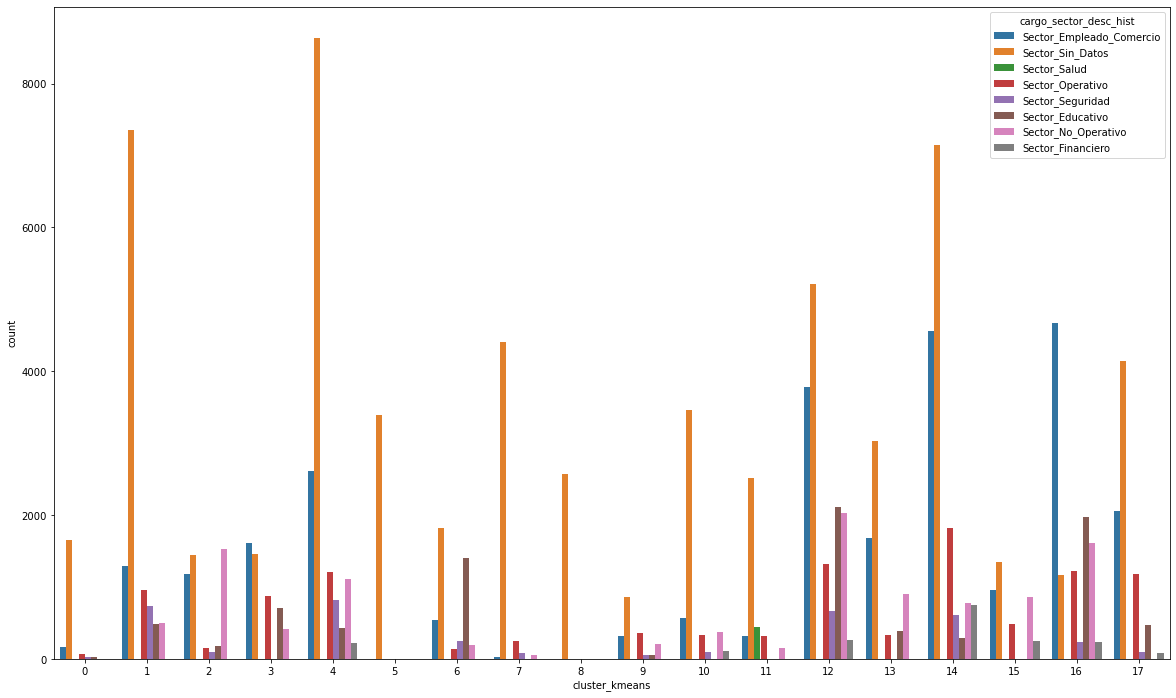

In [17]:
#cluster = df_clusters['cluster_kmeans'].astype(str)
plt.figure(figsize=(20,12))
sns.countplot(df_all_clust.cluster_kmeans, hue=df_all_clust.cargo_sector_desc_hist)
plt.show()

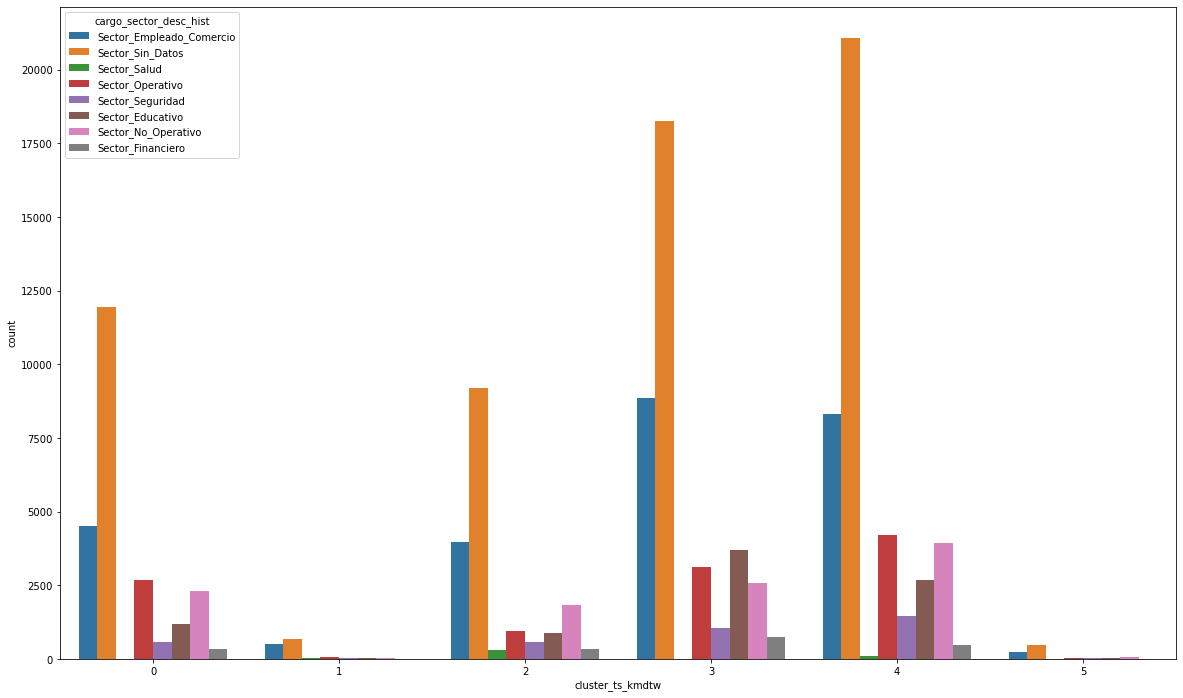

In [16]:
#cluster = df_clusters['cluster_kmeans'].astype(str)
plt.figure(figsize=(20,12))
sns.countplot(df_all_clust.cluster_ts_kmdtw, hue=df_all_clust.cargo_sector_desc_hist)
plt.show()

## TIME SERIES CLUSTERS


#### EUCLIDEANA VS DTW: PRODUCTOS PL, VI, ZE

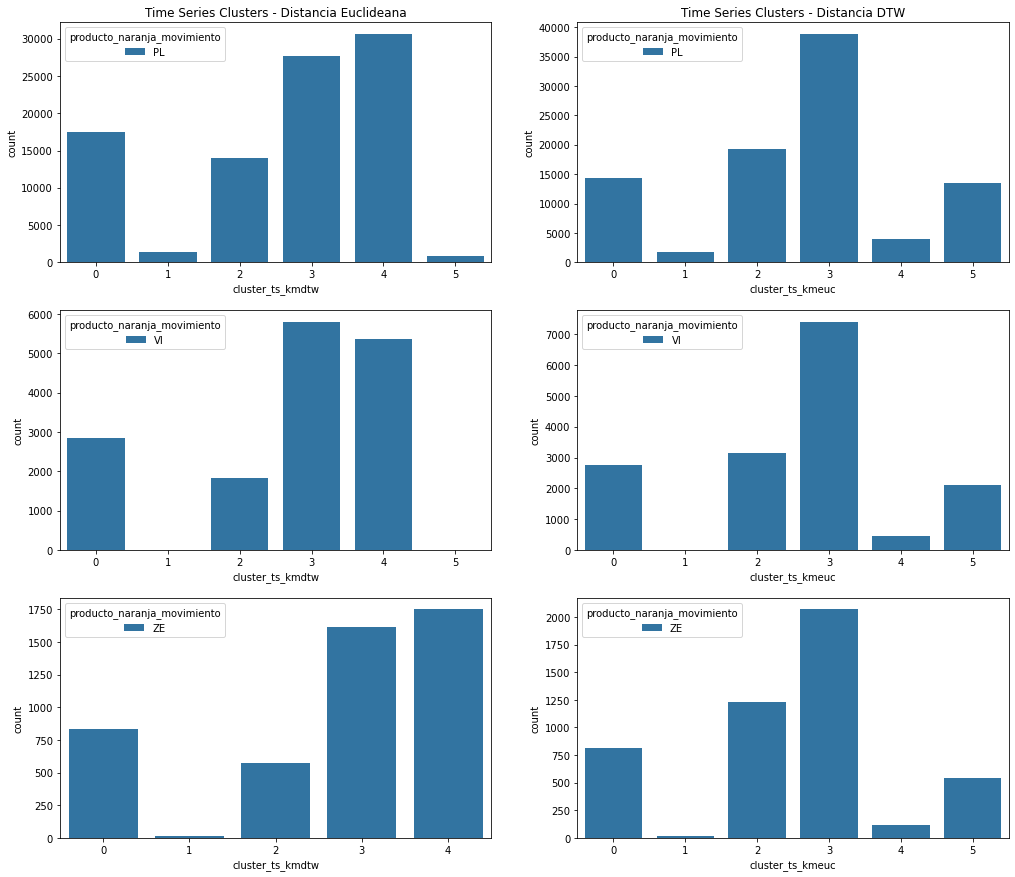

In [104]:
#cluster = df_clusters['cluster_kmeans'].astype(str)
plt.figure(figsize=(17,15))
plt.subplot(3,2,1)
plt.title('Time Series Clusters - Distancia Euclideana')
data = df_all_clust[df_all_clust['producto_naranja_movimiento'].isin(['PL'])]
sns.countplot(data.cluster_ts_kmdtw, hue=data.producto_naranja_movimiento)
plt.subplot(3,2,2)
plt.title('Time Series Clusters - Distancia DTW')
sns.countplot(data.cluster_ts_kmeuc, hue=data.producto_naranja_movimiento)
plt.subplot(3,2,3)
data = df_all_clust[df_all_clust['producto_naranja_movimiento'].isin(['VI'])]
sns.countplot(data.cluster_ts_kmdtw, hue=data.producto_naranja_movimiento)
plt.subplot(3,2,4)
sns.countplot(data.cluster_ts_kmeuc, hue=data.producto_naranja_movimiento)
plt.subplot(3,2,5)
data = df_all_clust[df_all_clust['producto_naranja_movimiento'].isin(['ZE'])]
sns.countplot(data.cluster_ts_kmdtw, hue=data.producto_naranja_movimiento)
plt.subplot(3,2,6)
sns.countplot(data.cluster_ts_kmeuc, hue=data.producto_naranja_movimiento)
plt.show()

### DISTANCIA DTW

#### DISTRIBUCION DE EDAD 1,5

<AxesSubplot:xlabel='edad_cliente', ylabel='Count'>

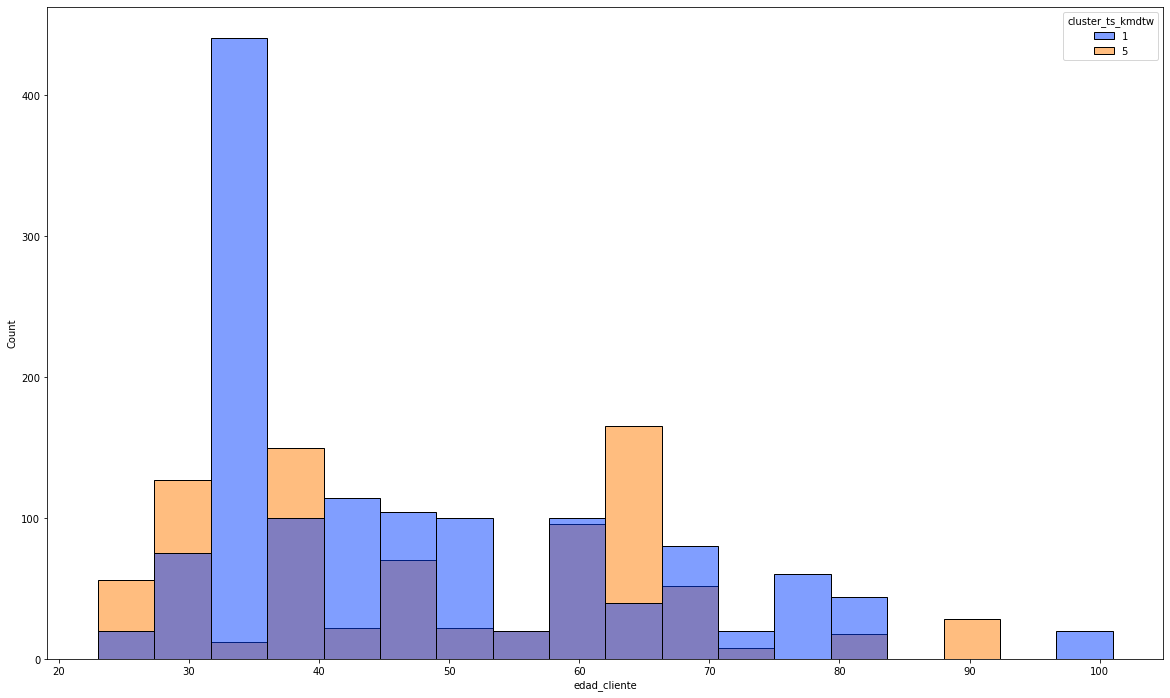

In [96]:
plt.figure(figsize=(20,12))
data = df_all_clust[df_all_clust['cluster_ts_kmdtw'].isin([1,5])]
sns.histplot(x="edad_cliente", data=data, hue=data.cluster_ts_kmdtw, palette='bright')

#### DISTRIBUCION DE EDAD 3,4

<AxesSubplot:xlabel='edad_cliente', ylabel='Count'>

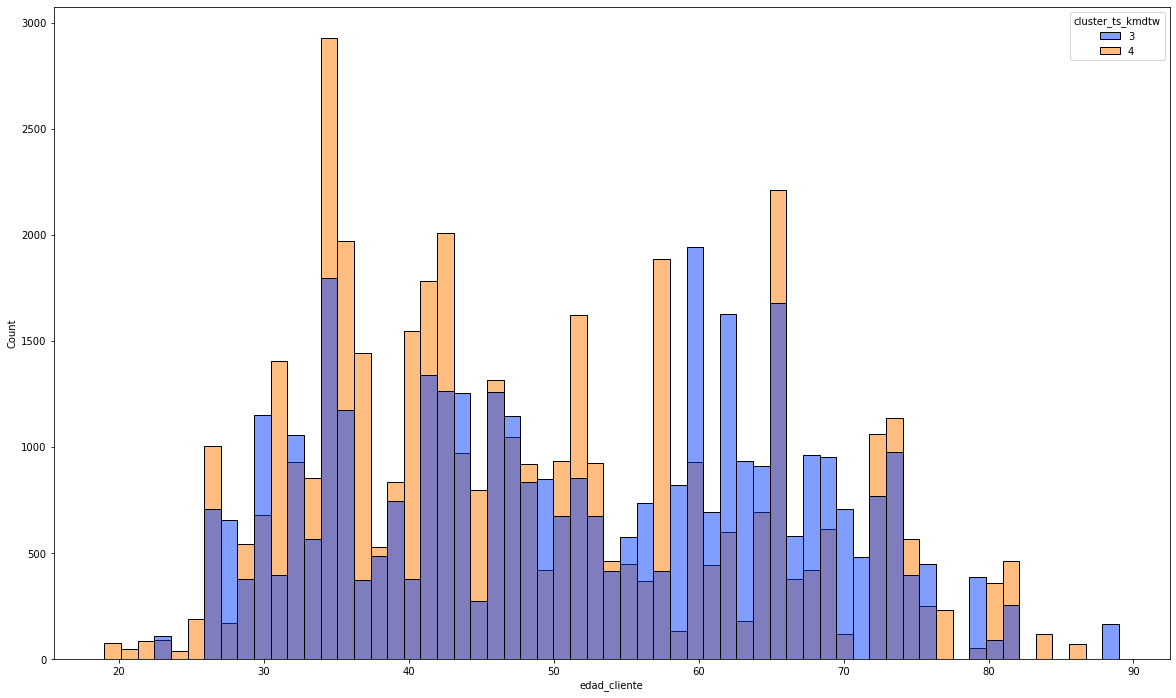

In [56]:
plt.figure(figsize=(20,12))
data = df_all_clust[df_all_clust['cluster_ts_kmdtw'].isin([3,4])]
sns.histplot(x="edad_cliente", data=data, hue=data.cluster_ts_kmdtw, palette='bright')

#### DISTRIBUCION DE EDAD 0,3

<AxesSubplot:xlabel='edad_cliente', ylabel='Count'>

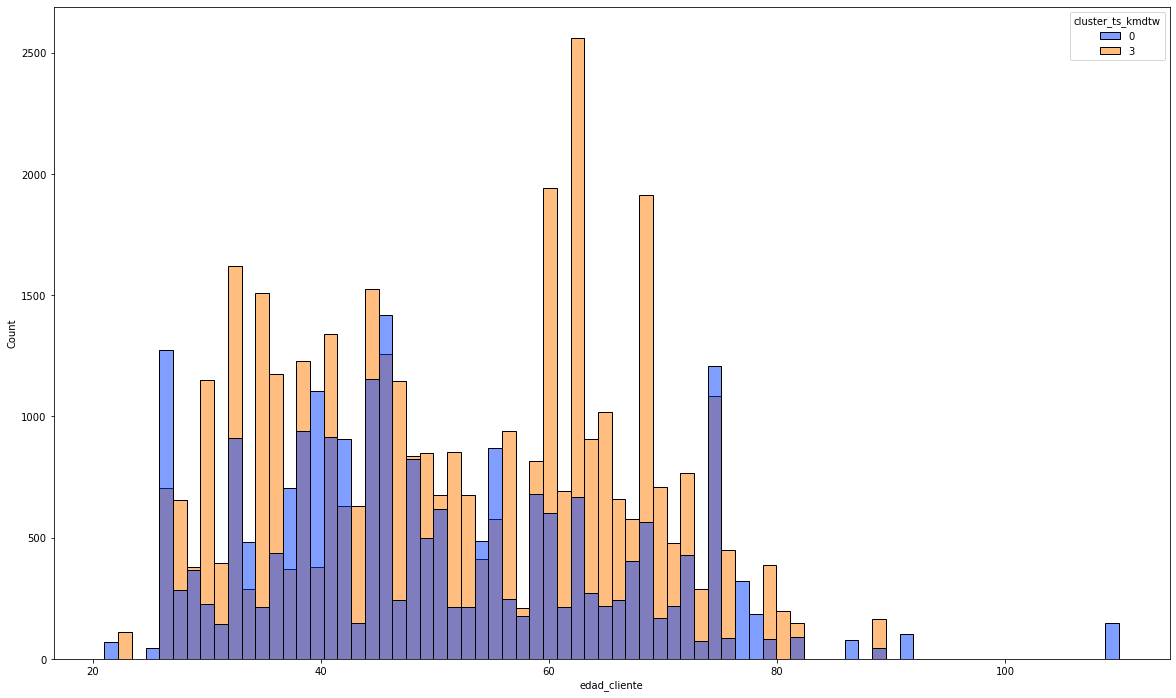

In [67]:
plt.figure(figsize=(20,12))
data = df_all_clust[df_all_clust['cluster_ts_kmdtw'].isin([0,3])]
sns.histplot(x="edad_cliente", data=data, hue=data.cluster_ts_kmdtw, palette='bright')

### DISTANCIA EUCLIDEANA

#### DISTRIBUCION DE EDADES TODOS LOS CLUSTERS

<AxesSubplot:xlabel='edad_cliente', ylabel='Count'>

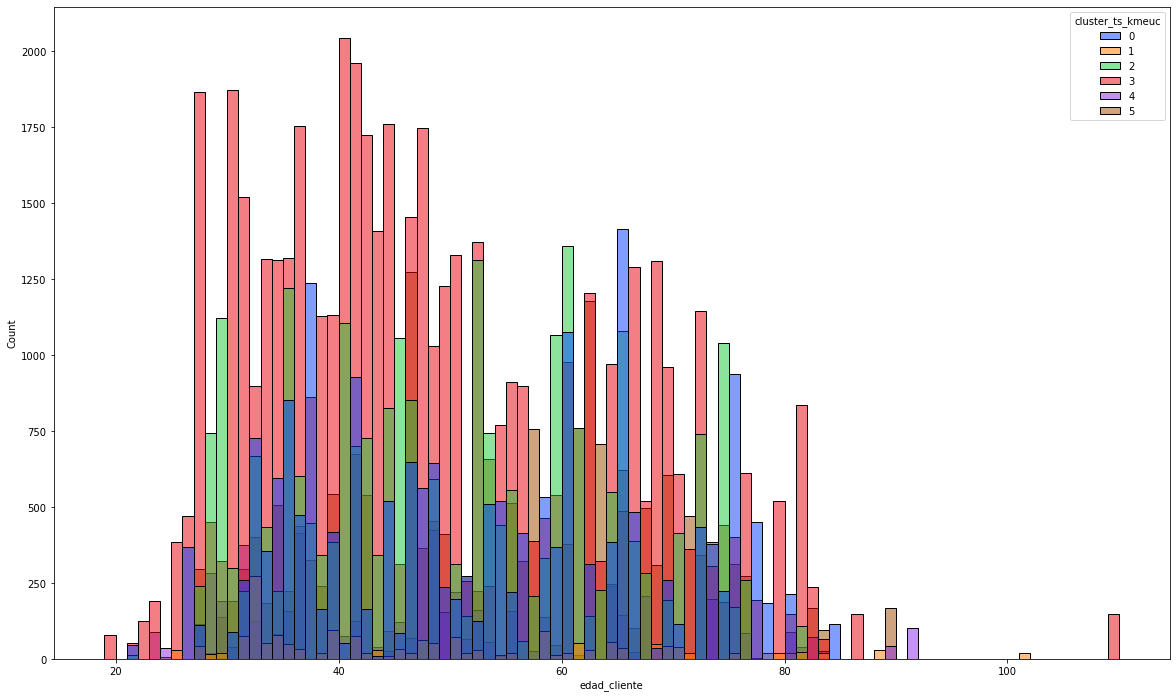

In [68]:
plt.figure(figsize=(20,12))
data = df_all_clust[df_all_clust['cluster_ts_kmeuc'].isin([0,1,2,3,4,5])]
sns.histplot(x="edad_cliente", data=data, hue=data.cluster_ts_kmeuc, palette='bright')

#### DISTRIBUCION DE EDAD 2,3

<AxesSubplot:xlabel='edad_cliente', ylabel='Count'>

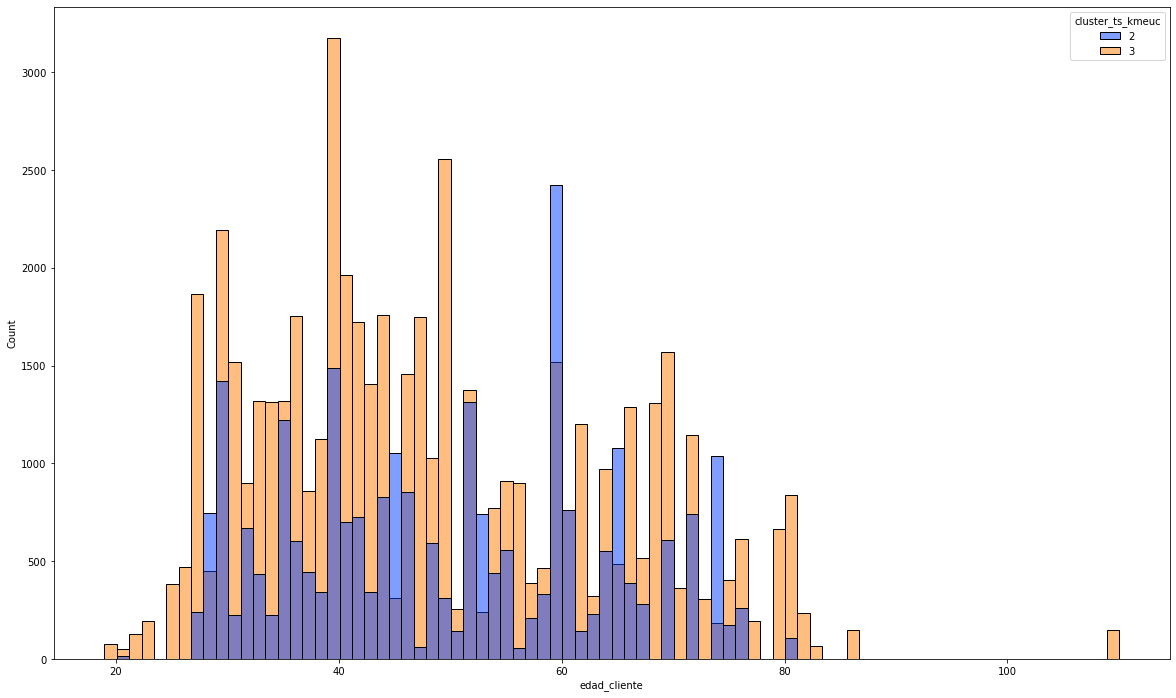

In [89]:
plt.figure(figsize=(20,12))
data = df_all_clust[df_all_clust['cluster_ts_kmeuc'].isin([2,3])]
sns.histplot(x="edad_cliente", data=data, hue=data.cluster_ts_kmeuc, palette='bright')